In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import glob
import matplotlib.pyplot as plt


##  All training data sets evaluation 

In [6]:
dfall=rm.comb_eval(models=['Md','Ni','Ib','Wm','De','So','Hc','Md_loo','Ni_loo','Ib_loo','Wm_loo','De_loo','So_loo'])

In [7]:
dfall['model'].fillna('avg',inplace=True)

In [4]:
dfall['nanY']=np.isnan(dfall.noiseceiling_Y)
dfall['nanXY']=np.isnan(dfall.noiseceiling_XY)
dfall['nanXR']=np.isnan(dfall.noise_X_R)

In [11]:
pd.pivot_table(data=dfall[dfall.model=='avg'],index='train_dataset',columns='eval_dataset',values='R_eval',aggfunc='count')

eval_dataset,Demand,IBC,MDTB,Nishimoto,Somatotopic,WMFS
train_dataset,,,,,,
Demand,259,84,168,42,56,112
HCP,333,108,216,54,72,144
IBC,259,84,168,42,56,112
MDTB,259,84,168,42,56,112
Nishimoto,259,84,168,42,56,112
Somatotopic,259,84,168,42,56,112
WMFS,259,84,168,42,56,112


## Overfitting to subjects 
To study overfitting of the group model to the subjects/data contained in training and test set
We compare the full group model with the leave-one-subject out...
Results indicate very strong overfitting

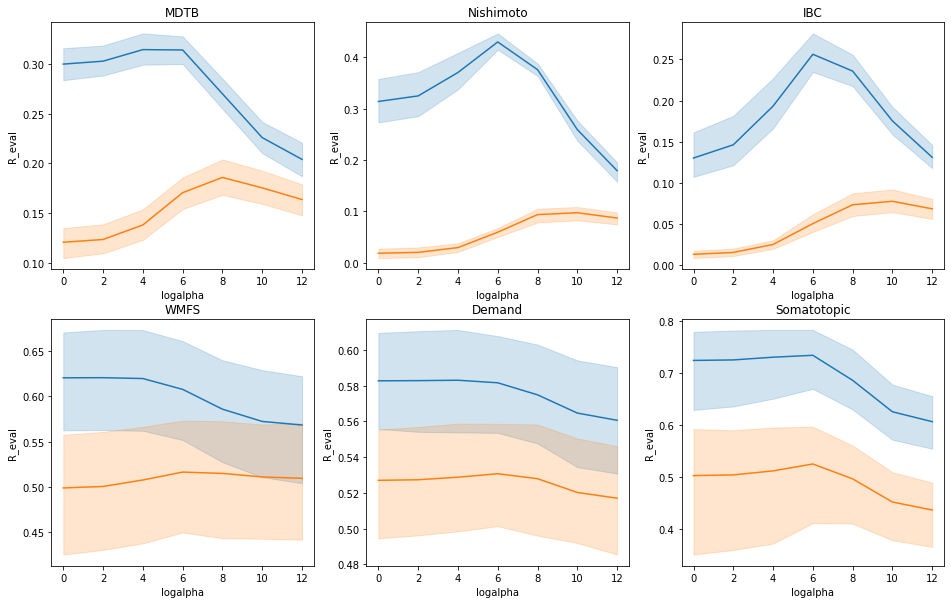

In [18]:
plt.figure(figsize=(16,10))
evd=['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic']

for i,ed in enumerate(evd):
    ax=plt.subplot(2,3,i+1)
    d=dfall[(dfall.eval_dataset==ed) & (dfall.train_dataset==ed)]
    plt.title(ed)
    sns.lineplot(data=d,y='R_eval',x='logalpha',hue='model',legend=None)

In [23]:
df=dfall[(dfall.eval_dataset=='MDTB') & (dfall.train_dataset=='MDTB') & (dfall.logalpha==8)] 
df.pivot_table(index=None,columns='model',values='R_eval',aggfunc='mean')

model,avg,loo
R_eval,0.27003,0.185891


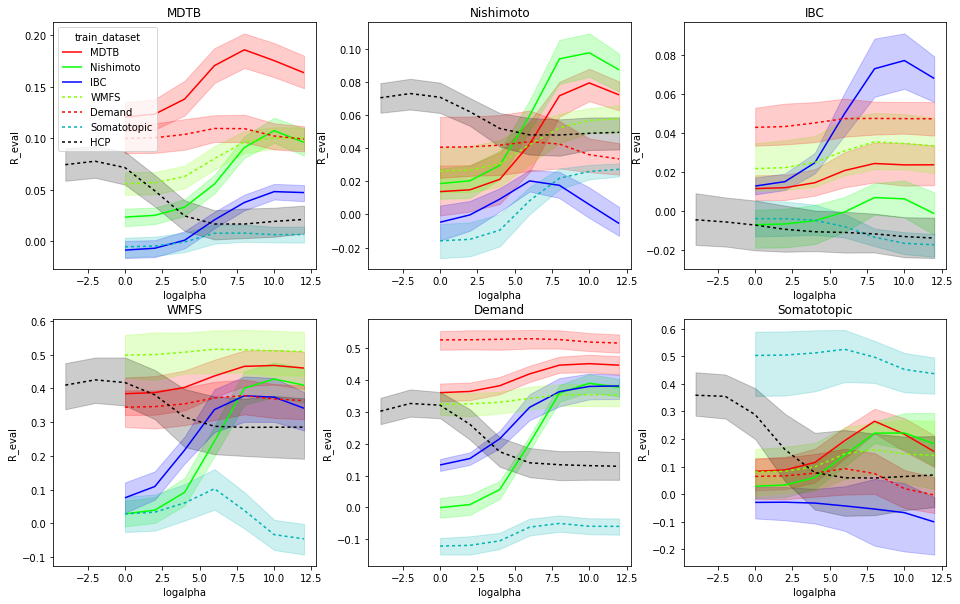

In [21]:
plt.figure(figsize=(16,10))
evd=['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic']
ho = ['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic','HCP']
palette = [[1,0,0],[0,1,0],[0,0,1],[0.5,1,0],[1,0,0],[0,0.7,0.7],[0,0,0]]
dashes = [[1,0],[1,0],[1,0],[2,2],[2,2],[2,2],[2,2]]

for i,ed in enumerate(evd):
    ax=plt.subplot(2,3,i+1)
    d=dfall[(dfall.eval_dataset==ed) 
            & ((dfall.train_dataset!=ed) 
            | (dfall.model=='loo'))]
    plt.title(ed)
    if i==0:
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',        palette=palette,style='train_dataset',
        hue_order=ho,style_order=ho,
        dashes=dashes)
    else: 
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',palette=palette,style='train_dataset',
        hue_order=ho,style_order=ho,dashes=dashes,legend=None)


TODO: 
* Fit high log-alpha.... 
* Crossvalidate models on their own dataset across subjects

<AxesSubplot:xlabel='logalpha', ylabel='R_eval'>

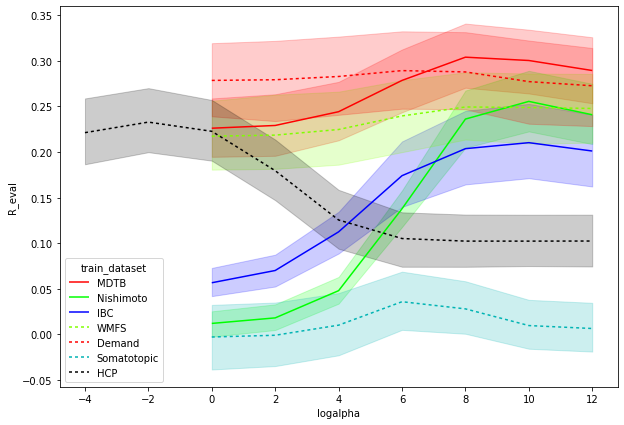

In [27]:
# Plot all evaluations on different datasets 
plt.figure(figsize=(10,7))
d=dfall[(dfall.train_dataset!=dfall.eval_dataset) | (dfall.model=='loo')]
sns.lineplot(data=d,y='R_eval',x='logalpha',
             hue='train_dataset',style='train_dataset',
             hue_order=ho,style_order=ho,
             palette=palette,dashes=dashes)


In [24]:
# determine best logalpha for each model 
pd.pivot_table(d,index=['train_dataset'],columns=['logalpha'],values=['R_eval'],aggfunc='mean')

R_eval                                                    \
logalpha          -4.0      -2.0       0.0       2.0       4.0       6.0    
train_dataset                                                               
Demand              NaN       NaN  0.278452  0.279185  0.282758  0.289204   
HCP            0.221187  0.232746  0.222668  0.179499  0.125431  0.105120   
IBC                 NaN       NaN  0.056628  0.070068  0.112443  0.174018   
MDTB                NaN       NaN  0.226046  0.229065  0.244154  0.278449   
Nishimoto           NaN       NaN  0.012050  0.018124  0.047952  0.137777   
Somatotopic         NaN       NaN -0.002831 -0.000926  0.010139  0.035847   
WMFS                NaN       NaN  0.217295  0.218486  0.224633  0.239515   

                                             
logalpha           8.0       10.0      12.0  
train_dataset                                
Demand         0.287738  0.277144  0.272574  
HCP            0.102282  0.102265  0.102380  
IBC            0.203632  0.210202  0.201051  
MDTB           0.303925  0.300283  0.289307  
Nishimoto      0.236071  0.255459  0.240801  
Somatotopic    0.027999  0.009708  0.006471  
WMFS           0.249337  0.248769  0.247709

In [25]:
A = pd.pivot_table(d,index=['train_dataset'],columns=['logalpha'],values=['R_eval'])
B = np.nan_to_num(A.values)
ind = B.argmax(axis=1)
A.columns[ind]

MultiIndex([('R_eval',  6.0),
            ('R_eval', -2.0),
            ('R_eval', 10.0),
            ('R_eval',  8.0),
            ('R_eval', 10.0),
            ('R_eval',  6.0),
            ('R_eval',  8.0)],
           names=[None, 'logalpha'])